# 0 Differential Calculus with Python

Calculus is the study of continuous change. It has two major subfields: *differential calculus*, which studies the rate of change of functions, and *integral calculus*, which studies the area under the curve. In this notebook, we will discuss the former.

*Differential calculus is at the core of Deep Learning, so it is important to understand what derivatives and gradients are, how they are used in Deep Learning, and understand what their limitations are.*

# Slope of a straight line

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

What is the slope of the following line?

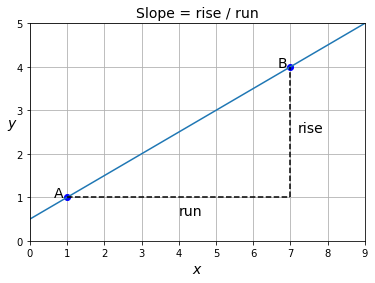

In [2]:
#@title
def get_line(a, b):
    rise = b[1] - a[1]
    run = b[0] - a[0]
    slope = rise / run
    intercept = a[1] - slope * a[0]  # y = mx + b; b = y - mx
    #x, y
    return [-1000, 1000], [-1000 * slope + intercept, 1000 * slope + intercept]

def plot_line(a, b, a_name="A", b_name="B"):
    #point
    for point, name in ((a, a_name), (b, b_name)):
        #plot(x1, y1)
        #plot(x2, y2)
        plt.plot(point[0], point[1], "bo")
        plt.text(point[0] - 0.35, point[1], name, fontsize=14)
    #line
    x, y = get_line(a, b)
    plt.plot(x, y)

def plot_rise_over_run(a, b):
    #run line
    plt.plot([a[0], b[0]], [a[1], a[1]], "k--")
    plt.text((a[0] + b[0]) / 2, a[1] - 0.4, "run", fontsize=14)
    #rise line
    plt.plot([b[0], b[0]], [a[1], b[1]], "k--")
    plt.text(b[0] + 0.2, (a[1] + b[1]) / 2, "rise", fontsize=14)

def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)

a = np.array([1, 1])
b = np.array([7, 4])
show([0, 9, 0, 5], title="Slope = rise / run")
plot_line(a, b)
plot_rise_over_run(a, b)

As you probably know, the slope of a (non-vertical) straight line can be calculated by taking any two points $\mathrm{A}$ and $\mathrm{B}$ on the line, and computing the "rise over run":

$slope = \dfrac{rise}{run} = \dfrac{\Delta y}{\Delta x} = \dfrac{y_\mathrm{B} - y_\mathrm{A}}{x_\mathrm{B} - x_\mathrm{A}}$


In this example, the rise is 3, and the run is 6, so the slope is 3/6 = 0.5.

# Defining the slope of a curve

But what if you want to know the slope of something else than a straight line? For example, let's consider the curve defined by $y = f(x) = x^2$:

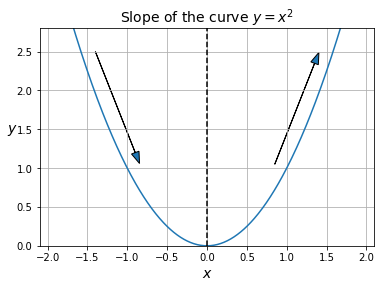

In [3]:
#@title
x = np.linspace(-2.1, 2.1, 500)
y = x**2
plt.plot(x, y)

plt.plot([0, 0], [0, 3], "k--")
#draws an arrow from (x, y) to (x+dx, y+dy)
plt.arrow(-1.4, 2.5, 0.5, -1.3, head_width=0.1)
plt.arrow(0.85, 1.05, 0.5, 1.3, head_width=0.1)
show([-2.1, 2.1, 0, 2.8], title="Slope of the curve $y = x^2$")

Obviously, the slope varies: on the left (i.e., when $x<0$), the slope is negative (i.e., when we move from left to right, the curve goes down), while on the right (i.e., when $x>0$) the slope is positive (i.e., when we move from left to right, the curve goes up). At the point $x=0$, the slope is equal to 0 (i.e., the curve is locally flat). The fact that the slope is 0 when we reach a minimum (or indeed a maximum) is crucially important, and we will come back to it later.

How can we put numbers on these intuitions? Well, say we want to estimate the slope of the curve at a point $\mathrm{A}$, we can do this by taking another point $\mathrm{B}$ on the curve, not too far away, and then computing the slope between these two points:

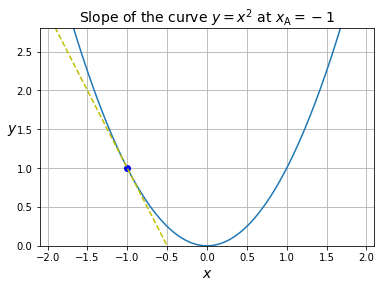

In [4]:
#@title
def plot_gradient(f, fp, x_A, axis=None):
    x_min, x_max = -1000, 1000
    fig, ax = plt.subplots()

    # plot f(x)
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax.plot(xs, ys)
    
    # plot the line AB and the labels A and B so they can be animated
    ax.plot(-1, 1, "bo")

    # plot the grid and axis labels
    title = "Slope of the curve $y = x^2$ at $x_\mathrm{A} = -1$"
    show(axis or [-2.1, 2.1, 0, 2.8], title=title)

    # plot the tangent to the curve at point A
    if fp:
        y_A = f(x_A)
        slope = fp(x_A)
        intercept = y_A - slope * x_A  #y = mx + b; b = y - mx
        ax.plot([x_min, x_max], [slope*x_min + intercept, slope*x_max + intercept],
                "y--")

plot_gradient(lambda x: x**2, lambda x: 2*x, -1)

This slope is called the **derivative** of the function $f$ at $x=x_\mathrm{A}$. For example, the derivative of the function $f(x)=x^2$ at $x=x_\mathrm{A}$ is equal to $2x_\mathrm{A}$ (we will see how to get this result shortly), so on the graph above, since the point $\mathrm{A}$ is located at $x_\mathrm{A}=-1$, the tangent line to the curve at that point has a slope of $-2$.

# Differentiability

Note that some functions are not quite as well-behaved as $x^2$: for example, consider the function $f(x)=|x|$, the absolute value of $x$:

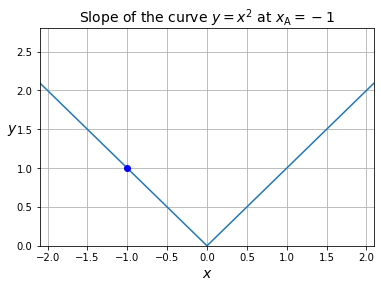

In [5]:
plot_gradient(lambda x: np.abs(x), None, -1)

The slope is -1 for any $x < 0$, and it is +1 for any $x > 0$, but **at $x = 0$, the slope is undefined**, since it is not possible to approximate the curve $y=|x|$ locally around the origin using a straight line, no matter how much you zoom in on that point.

The function $f(x)=|x|$ is said to be **non-differentiable** at $x=0$: its derivative is undefined at $x=0$. This means that the curve $y=|x|$ has an undefined slope at that point. However, the function $f(x)=|x|$ is **differentiable** at all other points.

In order for a function $f(x)$ to be differentiable at some point $x_\mathrm{A}$, the slope of the $(\mathrm{AB})$ line must approach a single finite value as $\mathrm{B}$ gets infinitely close to $\mathrm{A}$.

This implies several constraints:

* First, the function must of course be **defined** at $x_\mathrm{A}$. As a counterexample, the function $f(x)=\dfrac{1}{x}$ is undefined at $x_\mathrm{A}=0$, so it is not differentiable at that point.
* The function must also be **continuous** at $x_\mathrm{A}$, meaning that as $x_\mathrm{B}$ gets infinitely close to $x_\mathrm{A}$, $f(x_\mathrm{B})$ must also get infinitely close to $f(x_\mathrm{A})$. As a counterexample, $f(x)=\begin{cases}-1 \text{ if }x < 0\\+1 \text{ if }x \geq 0\end{cases}$ is not continuous at $x_\mathrm{A}=0$, even though it is defined at that point: indeed, when you approach it from the negative side, it does not approach infinitely close to $f(0)=+1$. Therefore, it is not continuous at that point, and thus not differentiable either.
* The function must not have a **breaking point** at $x_\mathrm{A}$, meaning that the slope that the $(\mathrm{AB})$ line approaches as $\mathrm{B}$ approaches $\mathrm{A}$ must be the same whether $\mathrm{B}$ approaches from the left side or from the right side. We already saw a counterexample with $f(x)=|x|$, which is both defined and continuous at $x_\mathrm{A}=0$, but which has a breaking point at $x_\mathrm{A}=0$: the slope of the curve $y=|x|$ is -1 on the left, and +1 on the right.
* The curve $y=f(x)$ must not be **vertical** at point $\mathrm{A}$. One counterexample is $f(x)=\sqrt[3]{x}$, the cubic root of $x$: the curve is vertical at the origin, so the function is not differentiable at $x_\mathrm{A}=0$, as you can see in the following animation:

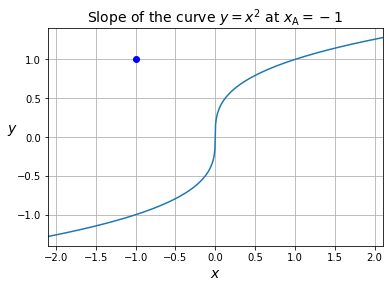

In [6]:
#@title
plot_gradient(lambda x: np.cbrt(x), None, 0,
                axis=[-2.1, 2.1, -1.4, 1.4])

## Notations

A word about notations: there are several other notations for the derivative that you will find in the literature:

$f'(x) = \dfrac{\mathrm{d}f(x)}{\mathrm{d}x} = \dfrac{\mathrm{d}}{\mathrm{d}x}f(x)$

This notation is also handy when a function is not named. For example $\dfrac{\mathrm{d}}{\mathrm{d}x}[x^2]$ refers to the derivative of the function $x \mapsto x^2$.

Moreover, when people talk about the function $f(x)$, they sometimes leave out "$(x)$", and they just talk about the function $f$. When this is the case, the notation of the derivative is also simpler:

$f' = \dfrac{\mathrm{d}f}{\mathrm{d}x} = \dfrac{\mathrm{d}}{\mathrm{d}x}f$

The $f'$ notation is Lagrange's notation, while $\dfrac{\mathrm{d}f}{\mathrm{d}x}$ is Leibniz's notation.

There are also other less common notations, such as Newton's notation $\dot y$ (assuming $y = f(x)$) or Euler's notation $\mathrm{D}f$.

# Differentiation rules

|                  | Function $f$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Derivative $f'$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
| ---------------- |------------------- | ------------------------------- |
| **Constant**     | $f(x) = c$         | $f'(x) = 0$                     |
| **Sum**          | $f(x) = g(x) + h(x)$ | $f'(x) = g'(x) + h'(x)$       |
| **Product**      | $f(x) = g(x) h(x)$ | $f'(x) = g(x)h'(x) + g'(x)h(x)$ |
| **Quotient**     | $f(x) = \dfrac{g(x)}{h(x)}$ | $f'(x) = \dfrac{g'(x)h(x) - g(x)h'(x)}{h^2(x)}$ |
| **Power**        | $f(x) = x^r$ with $r \neq 0$ | $f'(x) = rx^{r-1}$    |
| **Exponential**  | $f(x) = \exp(x)$   | $f'(x)=\exp(x)$                 |
| **Logarithm**    | $f(x) = \ln(x)$    | $f'(x) = \dfrac{1}{x}$         |
| **Sin**          | $f(x) = \sin(x)$   | $f'(x) = \cos(x)$              |
| **Cos**          | $f(x) = \cos(x)$   | $f'(x) = -\sin(x)$             |
| **Tan**          | $f(x) = \tan(x)$   | $f'(x) = \dfrac{1}{\cos^2(x)}$  |
| **Chain Rule**   | $f(x) = g(h(x))$ | $f'(x) = g'(h(x))\,h'(x)$  |



Let's try differentiating a simple function using the above rules: we will find the derivative of $f(x)=x^3+\cos(x)$. Using the rule for the derivative of sums, we find that $f'(x)=\dfrac{\mathrm{d}}{\mathrm{d}x}[x^3] + \dfrac{\mathrm{d}}{\mathrm{d}x}[\cos(x)]$. Using the rule for the derivative of powers and for the $\cos$ function, we find that $f'(x) = 3x^2 - \sin(x)$.

## The chain rule

The chain rule is easier to remember using Leibniz's notation:

If $f(x)=g(h(x))$ and $y=h(x)$, then: $\dfrac{\mathrm{d}f}{\mathrm{d}x} = \dfrac{\mathrm{d}f}{\mathrm{d}y} \dfrac{\mathrm{d}y}{\mathrm{d}x}$

Indeed, $\dfrac{\mathrm{d}f}{\mathrm{d}y} = f'(y) = f'(h(x))$ and $\dfrac{\mathrm{d}y}{\mathrm{d}x}=h'(x)$.

It is possible to chain many functions. For example, if $f(x)=g(h(i(x)))$, and we define $y=i(x)$ and $z=h(y)$, then $\dfrac{\mathrm{d}f}{\mathrm{d}x} = \dfrac{\mathrm{d}f}{\mathrm{d}z} \dfrac{\mathrm{d}z}{\mathrm{d}y} \dfrac{\mathrm{d}y}{\mathrm{d}x}$. Using Lagrange's notation, we get $f'(x)=g'(z)\,h'(y)\,i'(x)=g'(h(i(x)))\,h'(i(x))\,i'(x)$

The chain rule is crucial in Deep Learning, as a neural network is basically as a long composition of functions. For example, a 3-layer dense neural network corresponds to the following function: $f(\mathbf{x})=\operatorname{Dense}_3(\operatorname{Dense}_2(\operatorname{Dense}_1(\mathbf{x})))$ (in this example, $\operatorname{Dense}_3$ is the output layer).



# Derivatives and optimization

When trying to optimize a function $f(x)$, we look for the values of $x$ that minimize (or maximize) the function.

It is important to note that when a function reaches a minimum or maximum, assuming it is differentiable at that point.

So one way to optimize a function is to differentiate it and analytically find all the values for which the derivative is 0, then determine which of these values optimize the function (if any). For example, consider the function $f(x)=\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}$. Using the derivative rules (specifically, the sum rule, the product rule, the power rule and the constant rule), we find that $f'(x)=x^3 - 2x$. We look for the values of $x$ for which $f'(x)=0$, so $x^3-2x=0$, and therefore $x(x^2-2)=0$. So $x=0$, or $x=\sqrt2$ or $x=-\sqrt2$. As you can see on the following graph of $f(x)$, these 3 values correspond to local extrema. Two global minima $f\left(\sqrt2\right)=f\left(-\sqrt2\right)=-\dfrac{1}{2}$ and one local maximum $f(0)=\dfrac{1}{2}$.



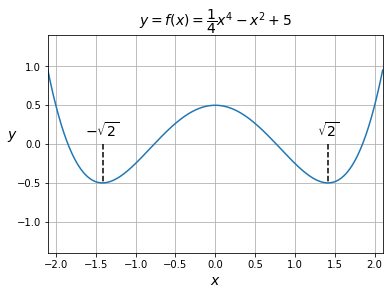

In [7]:
def f(x):
  return 1/4 * x**4 - x**2 + 1/2

xs = np.linspace(-2.1, 2.1, 500)
ys = f(xs)
plt.plot(xs, ys)
plt.plot([np.sqrt(2), np.sqrt(2)], [0, f(np.sqrt(2))], "k--")
plt.plot([-np.sqrt(2), -np.sqrt(2)], [0, f(-np.sqrt(2))], "k--")
plt.text(-np.sqrt(2), 0.1, r"$-\sqrt{2}$",
         fontsize=14, horizontalalignment="center")
plt.text(np.sqrt(2), 0.1, r"$\sqrt{2}$",
         fontsize=14, horizontalalignment="center")
show(axis=[-2.1, 2.1, -1.4, 1.4], title=r"$y=f(x)=\dfrac{1}{4}x^4 - x^2 + 5$")

If a function has a local extremum at a point $x_\mathrm{A}$ and is differentiable at that point, then $f'(x_\mathrm{A})=0$. However, the reverse is not always true. For example, consider $f(x)=x^3$. Its derivative is $f'(x)=x^2$, which is equal to 0 at $x_\mathrm{A}=0$. Yet, this point is _not_ an extremum, as you can see on the following diagram. It's just a single point where the slope is 0.

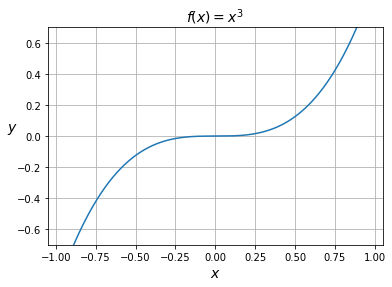

In [8]:
def f(x):
  return x**3

xs = np.linspace(-1.05, 1.05, 500)
ys = f(xs)
plt.plot(xs, ys)
show(axis=[-1.05, 1.05, -0.7, 0.7], title=r"$f(x)=x^3$")

So in short, you can optimize a function by analytically working out the points at which the derivative is 0, and then investigating only these points. It's a beautifully elegant solution, but it requires a lot of work, and it's not always easy, or even possible. For neural networks, it's practically impossible.

Another option to optimize a function is to perform **Gradient Descent** (we will consider minimizing the function, but the process would be almost identical if we tried to maximize a function instead): start at a random point $x_0$, then use the function's derivative to determine the slope at that point, and move a little bit in the downwards direction, then repeat the process until you reach a local minimum, and cross your fingers in the hope that this happens to be the global minimum.

At each iteration, the step size is proportional to the slope, so the process naturally slows down as it approaches a local minimum. Each step is also proportional to the learning rate: a parameter of the Gradient Descent algorithm itself (since it is not a parameter of the function we are optimizing, it is called a **hyperparameter**).

Here is an animation of this process on the function $f(x)=\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}$:

In [9]:
# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')
def animate_gradient_descent(f, fp, f_str, x_0):
    learning_rate = 0.01
    n_frames = 200
    x_min, x_max = -1000, 1000

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

    # plot f
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax1.plot(xs, ys)

    # plot tangent
    line_tangent, = ax1.plot([x_min, x_max], [0, 0])

    # plot f'
    xs = np.linspace(-2.1, 2.1, 500)
    ys = fp(xs)
    ax2.plot(xs, ys, "r-")

    # plot points A
    point_A1, = ax1.plot(0, 0, "bo")
    point_A2, = ax2.plot(0, 0, "bo")

    show([-2.1, 2.1, -1.4, 1.4], ax=ax1, ylabel="$f(x)$",
        title=r"$y=f(x)=" + f_str + "$ and the tangent at $x=x_\mathrm{A}$")
    show([-2.1, 2.1, -4.2, 4.2], ax=ax2, ylabel="$f'(x)$",
        title=r"$y=f'(x)$ and the slope of the tangent at $x=x_\mathrm{A}$")

    xs = []
    x = x_0
    for index in range(n_frames):
      xs.append(x)
      slope = fp(x)
      x = x - slope * learning_rate

    def update_graph(i):
        x = xs[i]
        f_x = f(x)
        df_dx = fp(x)
        offset = f_x - df_dx * x
        line_tangent.set_data([x_min, x_max],
                              [df_dx * x_min + offset, df_dx * x_max + offset])
        point_A1.set_data(x, f_x)
        point_A2.set_data(x, df_dx)
        return line_tangent, point_A1, point_A2

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

def f(x):
  return 1/4 * x**4 - x**2 + 1/2

def fp(x):
  return x**3 - 2*x

animate_gradient_descent(f, fp, r"\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}",
                         x_0=1/4)

In this example, we started with $x_0 = \dfrac{1}{4}$, so Gradient Descent "rolled down" towards the minimum value at $x = \sqrt2$. But if we had started at $x_0 = -\dfrac{1}{4}$, it would have gone towards $-\sqrt2$. This illustrates the fact that the initial value is important: depending on $x_0$, the algorithm may converge to a global minimum (hurray!) or to a poor local minimum (boo!) or stay stuck on a plateau, such as a horizontal inflection point (boo!).

There are many variants of the Gradient Descent algorithm, but they all rely on the derivative of the cost function with regards to the model parameters|.

# Partial derivatives
Up to now, we have only considered functions with a single variable $x$. What happens when there are multiple variables? For example, let's start with a simple function with 2 variables: $f(x,y)=\sin(xy)$. If we plot this function, using $z=f(x,y)$, we get the following 3D graph. I also plotted some point $\mathrm{A}$ on the surface, along with two lines I will describe shortly.

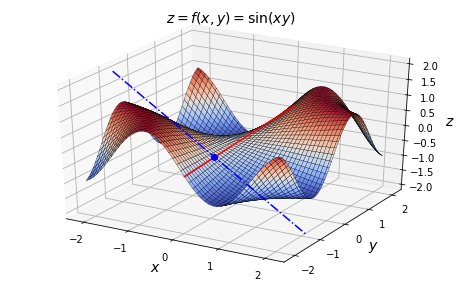

In [21]:
#@title
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(f, title):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')

    xs = np.linspace(-2.1, 2.1, 100)
    ys = np.linspace(-2.1, 2.1, 100)
    xs, ys = np.meshgrid(xs, ys)
    zs = f(xs, ys)

    surface = ax.plot_surface(xs, ys, zs,
                              cmap=mpl.cm.coolwarm,
                              linewidth=0.3, edgecolor='k')

    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$y$", fontsize=14)
    ax.set_zlabel("$z$", fontsize=14)
    ax.set_title(title, fontsize=14)
    return ax

def plot_tangents(ax, x_A, y_A, f, df_dx, df_dy):
    ax.plot3D([x_A], [y_A], f(x_A, y_A), "bo", zorder=10)
    x_min, x_max = -2.1, 2.1
    slope_x = df_dx(x_A, y_A)
    offset_x = f(x_A, y_A) - slope_x * x_A
    ax.plot3D([x_min, x_max], [y_A, y_A],
              [slope_x * x_min + offset_x, slope_x * x_max + offset_x], "b-.",
              zorder=5)
    y_min, y_max = -2.1, 2.1
    slope_y = df_dy(x_A, y_A)
    offset_y = f(x_A, y_A) - slope_y * y_A
    ax.plot3D([x_A, x_A], [y_min, y_max],
              [slope_y * y_min + offset_y, slope_y * y_max + offset_y], "r-",
              zorder=5)

def f(x, y):
    return np.sin(x * y)

def df_dx(x, y):
    return y * np.cos(x * y)

def df_dy(x, y):
    return x * np.cos(x * y)

ax = plot_3d(f, r"$z = f(x, y) = \sin(xy)$")
plot_tangents(ax, 0.1, -1, f, df_dx, df_dy)

plt.show()

If you were to stand on this surface at point $\mathrm{A}$ and walk along the $x$ axis towards the right (increasing $x$), your path would go down quite steeply (along the dashed blue line). The slope along this axis would be negative. However, if you were to walk along the $y$ axis, towards the back (increasing $y$), then your path would almost be flat (along the solid red line), at least locally: the slope along that axis, at point $\mathrm{A}$, would be very slightly positive.

As you can see, a single number is no longer sufficient to describe the slope of the function at a given point. We need one slope for the $x$ axis, and one slope for the $y$ axis. One slope for each variable. To find the slope along the $x$ axis, called the **partial derivative of $f$ with regards to $x$**, and noted $\dfrac{\partial f}{\partial x}$ (with curly $\partial$), we can differentiate $f(x,y)$ with regards to $x$ while treating all other variables (in this case just $y$) as constants

let $$f(x) = ax + y$$

$$\dfrac{\partial f}{\partial x} = a$$

$$\dfrac{\partial f}{\partial y} = 1$$


We now have equations to compute the slope along the $x$ axis and along the $y$ axis. But what about the other directions? If you were standing on the surface at point $\mathrm{A}$, you could decide to walk in any direction you choose, not just along the $x$ or $y$ axes. What would the slope be then? Shouldn't we compute the slope along every possible direction?

Well, it can be shown that if all the partial derivatives are defined and continuous in a neighborhood around point $\mathrm{A}$, then the function $f$ is **totally differentiable** at that point, meaning that it can be locally approximated by a plane $P_\mathrm{A}$ (the tangent plane to the surface at point $\mathrm{A}$). In this case, having just the partial derivatives along each axis ($x$ and $y$ in our case) is sufficient to perfectly characterize that plane.

In Deep Learning, we will generally be dealing with well-behaved functions that are totally differentiable at any point where all the partial derivatives are defined, but you should know that some functions are not that nice, just like normal derivatives

# Gradients

So far we have considered only functions with a single variable $x$, or with 2 variables, $x$ and $y$, but the previous paragraph also applies to functions with more variables. So let's consider a function $f$ with $n$ variables: $f(x_1, x_2, \dots, x_n)$. For convenience, we will define a vector $\mathbf{x}$ whose components are these variables:

$\mathbf{x}=\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}$ 

Now $f(\mathbf{x})$ is easier to write than $f(x_1, x_2, \dots, x_n)$.

The gradient of the function $f(\mathbf{x})$ at some point $\mathbf{x}_\mathrm{A}$ is the vector whose components are all the partial derivatives of the function at that point. It is noted $\nabla f(\mathbf{x}_\mathrm{A})$, or sometimes $\nabla_{\mathbf{x}_\mathrm{A}}f$:

$\nabla f(\mathbf{x}_\mathrm{A}) = \begin{pmatrix}
\dfrac{\partial f}{\partial x_1}(\mathbf{x}_\mathrm{A})\\
\dfrac{\partial f}{\partial x_2}(\mathbf{x}_\mathrm{A})\\
\vdots\\\
\dfrac{\partial f}{\partial x_n}(\mathbf{x}_\mathrm{A})\\
\end{pmatrix}$

Assuming the function is totally differentiable at the point $\mathbf{x}_\mathbf{A}$, then the surface it describes can be approximated by a plane at that point (as discussed in the previous section), and the gradient vector is the one that points towards the steepest slope on that plane.

# Jacobians

Until now we have only considered functions that output a scalar, but it is possible to output vectors instead. For example, a classification neural network typically outputs one probability for each class, so if there are $m$ classes, the neural network will output an $d$-dimensional vector for each input.

In Deep Learning we generally only need to differentiate the loss function, which almost always outputs a single scalar number. But suppose for a second that you want to differentiate a function $\mathbf{f}(\mathbf{x})$ which outputs $d$-dimensional vectors. The good news is that you can treat each _output_ dimension independently of the others. This will give you a partial derivative for each input dimension and each output dimension. If you put them all in a single matrix, with one column per input dimension and one row per output dimension, you get the so-called **Jacobian matrix**.

$$
\mathbf{J}_\mathbf{f}(\mathbf{x}_\mathbf{A}) = \begin{pmatrix}
\dfrac{\partial f_1}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_1}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_1}{\partial x_n}(\mathbf{x}_\mathbf{A})\\
\dfrac{\partial f_2}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_2}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_2}{\partial x_n}(\mathbf{x}_\mathbf{A})\\
\vdots && \vdots && \ddots && \vdots \\
\dfrac{\partial f_m}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_m}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_m}{\partial x_n}(\mathbf{x}_\mathbf{A})
\end{pmatrix}
$$

The partial derivatives themselves are often called the **Jacobians**. It's just the first order partial derivatives of the function $\mathbf{f}$.

# Hessians

Let's come back to a function $f(\mathbf{x})$ which takes an $n$-dimensional vector as input and outputs a scalar. If you determine the equation of the partial derivative of $f$ with regards to $x_i$ (the $i^\text{th}$ component of $\mathbf{x}$), you will get a new function of $\mathbf{x}$: $\dfrac{\partial f}{\partial x_i}$. You can then compute the partial derivative of this function with regards to $x_j$ (the $j^\text{th}$ component of $\mathbf{x}$). The result is a partial derivative of a partial derivative: in other words, it is a **second order partial derivatives**, also called a **Hessian**. It is noted $\mathbf{x}$: $\dfrac{\partial^2 f}{\partial x_jx_i}$. If $i\neq j$ then it is called a **mixed second order partial derivative**.
Or else, if $j=i$, it is noted $\dfrac{\partial^2 f}{\partial {x_i}^2}$

Let's look at an example: $f(x, y)=\sin(xy)$. As we showed earlier, the first order partial derivatives of $f$ are: $\dfrac{\partial f}{\partial x}=y\cos(xy)$ and $\dfrac{\partial f}{\partial y}=x\cos(xy)$. So we can now compute all the Hessians (using the derivative rules we discussed earlier):

* $\dfrac{\partial^2 f}{\partial x^2} = \dfrac{\partial f}{\partial x}\left[y\cos(xy)\right] = -y^2\sin(xy)$
* $\dfrac{\partial^2 f}{\partial y\,\partial x} = \dfrac{\partial f}{\partial y}\left[y\cos(xy)\right] = \cos(xy) - xy\sin(xy)$
* $\dfrac{\partial^2 f}{\partial x\,\partial y} = \dfrac{\partial f}{\partial x}\left[x\cos(xy)\right] = \cos(xy) - xy\sin(xy)$
* $\dfrac{\partial^2 f}{\partial y^2} = \dfrac{\partial f}{\partial y}\left[x\cos(xy)\right] = -x^2\sin(xy)$

Note that $\dfrac{\partial^2 f}{\partial x\,\partial y} = \dfrac{\partial^2 f}{\partial y\,\partial x}$. This is the case whenever all the partial derivatives are defined and continuous in a neighborhood around the point at which we differentiate.

The matrix containing all the Hessians is called the **Hessian matrix**:

$$
\mathbf{H}_f(\mathbf{x}_\mathbf{A}) = \begin{pmatrix}
\dfrac{\partial^2 f}{\partial {x_1}^2}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial x_1\, \partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial x_1\, \partial x_n}(\mathbf{x}_\mathbf{A})\\
\dfrac{\partial^2 f}{\partial x_2\,\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial {x_2}^2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial x_2\, \partial x_n}(\mathbf{x}_\mathbf{A})\\
\vdots && \vdots && \ddots && \vdots \\
\dfrac{\partial^2 f}{\partial x_n\,\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial x_n\,\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial {x_n}^2}(\mathbf{x}_\mathbf{A})\\
\end{pmatrix}
$$